C:\Users\Asus\AppData\Local\Temp\ipykernel_21612\642675846.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks + [benchmark], start="2020-01-01", end="2025-01-01")["Close"]
[*********************100%***********************]  8 of 8 completed
C:\Users\Asus\AppData\Local\Temp\ipykernel_21612\642675846.py:14: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


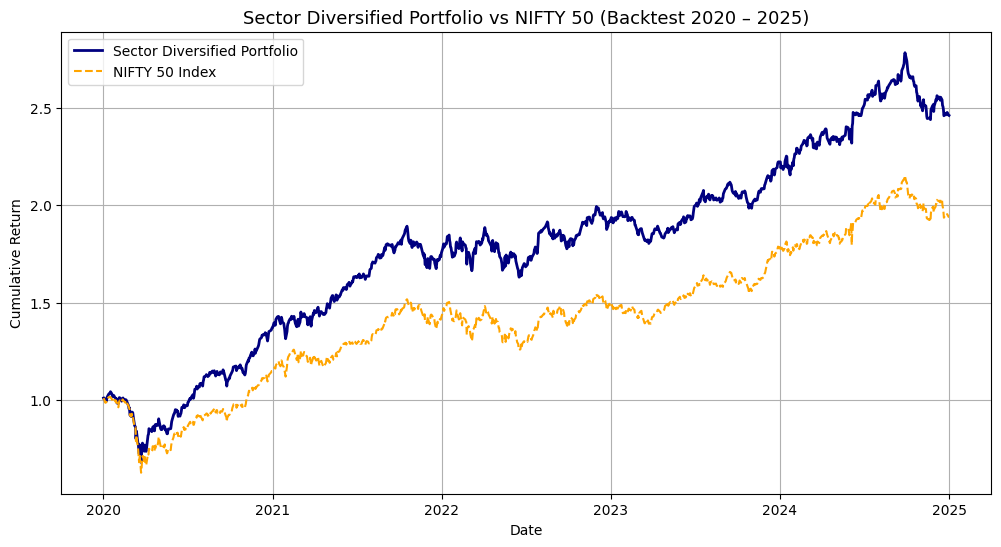

📊 Portfolio Sharpe Ratio: 1.06
📈 Portfolio Total Return: 146.22 %
🏦 Benchmark Total Return: 94.09 %


C:\Users\Asus\AppData\Local\Temp\ipykernel_21612\642675846.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("📈 Portfolio Total Return:", round((portfolio_cum[-1] - 1) * 100, 2), "%")
C:\Users\Asus\AppData\Local\Temp\ipykernel_21612\642675846.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("🏦 Benchmark Total Return:", round((nifty_cum[-1] - 1) * 100, 2), "%")


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define sector-diversified portfolio
stocks = ["HDFCBANK.NS", "RELIANCE.NS", "INFY.NS", "HINDUNILVR.NS", "SUNPHARMA.NS", "MARUTI.NS", "TATASTEEL.NS"]
benchmark = "^NSEI"  # NIFTY 50

# Download data
data = yf.download(stocks + [benchmark], start="2020-01-01", end="2025-01-01")["Close"]

# Calculate daily returns
returns = data.pct_change().dropna()

# Equal-weight portfolio across all sectors
weights = np.ones(len(stocks)) / len(stocks)
portfolio_returns = (returns[stocks] * weights).sum(axis=1)
nifty_returns = returns[benchmark]

# Cumulative performance
portfolio_cum = (1 + portfolio_returns).cumprod()
nifty_cum = (1 + nifty_returns).cumprod()

# Sharpe Ratio
sharpe_ratio = (portfolio_returns.mean() / portfolio_returns.std()) * np.sqrt(252)

# Plot performance
plt.figure(figsize=(12,6))
plt.plot(portfolio_cum, label='Sector Diversified Portfolio', linewidth=2, color='navy')
plt.plot(nifty_cum, label='NIFTY 50 Index', linestyle='--', color='orange')
plt.title("Sector Diversified Portfolio vs NIFTY 50 (Backtest 2020 – 2025)", fontsize=13)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

# Display results
print("📊 Portfolio Sharpe Ratio:", round(sharpe_ratio, 2))
print("📈 Portfolio Total Return:", round((portfolio_cum[-1] - 1) * 100, 2), "%")
print("🏦 Benchmark Total Return:", round((nifty_cum[-1] - 1) * 100, 2), "%")
